<a href="https://colab.research.google.com/github/acanavire/Intro_CDIA/blob/main/Notebooks/3_Datos_faltantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia de Datos e Inteligencia Artificial**
# **4. Datos faltantes**

Este módulo tiene el objetivo de identificar y tratar valores faltantes. Para ello estaremos identificando tipos de valores faltantes y aplicando técnicas de detección e imputación de valores faltantes utilizando principalmente las librerías pandas, missingno, y sklearn.



## 🎯 Valores faltantes: definición y riesgo

---
### 🥇 ¿Qué son los valores faltantes? 5 minutos
---
La falta de datos es un problema común e inevitable en los conjuntos de datos del mundo real. Se produce cuando faltan uno o más valores en una observación o registro en particular. Esta falta de datos puede afectar en gran medida la validez y la fiabilidad de cualquier análisis o modelo creado con esos datos.

imagen


La falta de datos puede ocurrir por varias razones como:
* errores de entrada de datos
* mal funcionamiento de los sensores o errores en el proceso de ingesta

Si se ignoran, pueden generar resultados inexactos. Como decimos en el mundo de los datos: basura entra, basura sale, lo que significa que si los datos no son correctos, los modelos o análisis creados con esos datos tampoco serán correctos.

Por otra parte, el tratamiento de valores faltantes no es solo cuestión de rellenar huecos, ya que se pueden  alterar patrones, generar sesgos y afectar modelos predictivos. Por ejemplo, si faltan valores en una serie temporal, el modelo puede fallar en capturar la estacionalidad o si una variable es clave para un modelo de aprendizaje automático imputarse con un valor constante puede afectar la capacidad de predicción.

Nota:
Sesgo que es


#### Python

Al leer un archivo con espacios en blanco, automáticamente asigna a ese dato un <span style="color:FireBrick">**NaN**</span> numérico con capacidad de ser imputado.

Sin embargo,  en Python existe el objeto <span style="color:FireBrick">**None**</span>, el cual es un single null datatype. El dato <span style="color:FireBrick">**NaN**</span> puede ser usado como valor numérico en operaciones matematicas, mientras que <span style="color:FireBrick">**None**</span> no, o al menos no debería.

* <span style="color:FireBrick">**NaN**</span> es un valor numérico, definido en IEEE 754 floating-point standard.

* <span style="color:FireBrick">**None**</span> es un internal Python type (NoneType) y es mas parecido al ''no existente'' o "vacio" que al  "numerically invalid" en este contexto.

**¿Por qué no puede usarse <span style="color:FireBrick">**None**</span> como el dato nulo?**

Porque Numpy y Pandas no propagan estos datos a traves de operaciones aritméticas, y para evitar usarlo en un algoritmo hay que testear cada dato para ver si es **None**.



---
### 🥇 Tipos de Datos Faltantes
---


* **Valores faltantes completamente al azar (MCAR ,Missing Completely at Random)**

Los valores que se ausentan en una determinada variable (Y) no están asociados a otras variables de un determinado conjunto de datos ni a la propia variable (Y). En otras palabras, no hay ninguna razón particular para los valores que faltan.

  * Ejemplos: las observaciones que pueden perderse, porque el equipo no funcionaba correctamente, el clima era terrible, la persona de cuestionario se enfermó.

* **Valores faltantes al azar (MAR, Missing at Random)**

La ausencia al azar se produce cuando la falta no es aleatoria, sino que puede explicarse plenamente por variables de las que se dispone de información completa.

  * Ejemplos: los valores faltantes en nota del recuperatorio depende del valor observado para la nota del primer parcial en el conjunto de datos, los valores faltantes en salario depende del rol del empleado en el conjunto de datos.

* **Valores faltantes no al azar (MNAR, Missing Not at Random)**

La omisión depende de datos no observados o del valor de los propios datos omitidos.


  * Ejemplos: los valores faltantes en la variable edad se debe a que las edades de las personas son muy grande y quizás por eso no contestan o los valores faltantes en ingreso de jefes de hogar se debe a que quizás son muy bajos entre las personas encuestadas y desean no indicarlo.


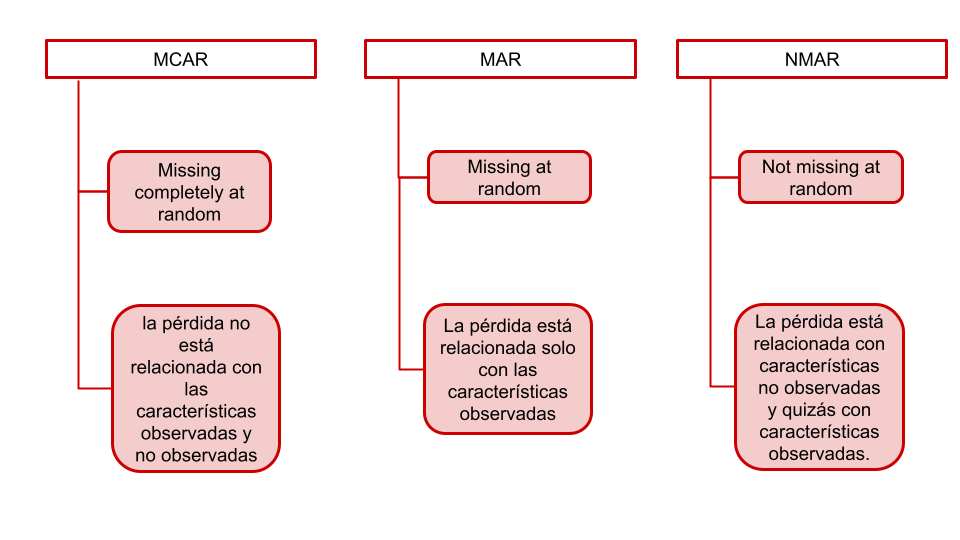

## Conjunto de datos con los que se trabajará
Existen dos conjuntos de datos de acceso público que se utilizarán para explicar los conceptos:

* 1. [Titanic Dataset](https://www.kaggle.com/c/titanic) para el problema de datos no en series temporales
  * Conjunto de datos sobre los pasajeros de RMS Titanic(es decir, nombre, edad, género, clase socioeconómica, etc.) en base al hundimiento del Titanic, uno de los naufragios más infames de la historia.

* 2. [Air Quality Data in India (2015 - 2020)](https://www.kaggle.com/rohanrao/air-quality-data-in-india) para el problema de datos en forma de series temporales
  * Conjunto de datos sobre la calidad del aire y AQI (índice de calidad del aire) a nivel horario y diario de varias estaciones en varias ciudades de la India.




#### Titanic: Descripción de datos
| Variable	| Definition |	Key |
|-------|-------|--------|
|survival	| Survival	| 0 = No, 1 = Yes |
|pclass	| Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex |	Sex	| |
|Age |	Age in years	| |
|sibsp |	# of siblings / spouses aboard the Titanic	| |
|parch |	# of parents / children aboard the Titanic	| |
|ticket	| Ticket number	| |
|fare	| Passenger fare	| |
|cabin	| Cabin number	| |
|embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

In [ ]:
# Importar librerias
# datos
import os
import pandas as pd
import numpy as np

#visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Importar librería para trabajar con google colab
from google.colab import drive

# Montar drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Configurar para trabajar con las carpetas que alojan los datos y notebook.
import os
# os.chdir() cambia el directorio de trabajo actual a una ruta específica.
os.chdir('/content/drive/MyDrive/cs_ia_2024/POC - curso_on_demand/Contenido para plataforma/CDIA - contenido/Data/') #cambia el directorio de trabajo actual a una ruta específica

In [ ]:
# Leer conjunto de datos
titanic_df = pd.read_csv('Titanic-Dataset.csv')

# Mostrar
print("Cantidad de filas: {} columnas:{}".format(titanic_df.shape[0],titanic_df.shape[1]))
display(titanic_df.head(3))

Cantidad de filas: 891 columnas:12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# Obtener un resumen técnico del DataFrame que almacena al conjunto de dato
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Se observa que hay 891 registros de pasajeros (filas) y 12 variables (columnas) tal que 7 variables son númericas y 5 variables de tipo cadena.
  * Se identifican menos cantidad de valores en las variables `Age`(714) y `Cabin`(204) y `Embarked`(889) en relación a los 891 registros. Habría valores faltantes.

El conjunto de datos tiene el objetivo de predecir si los pasajeros sobrevivieron o no al hundimiento del Titanic. De esta forma la columna Survivied (Sobrevivieron) es la columna objetivo del conjunto de datos. Examinando la variable:

* 0: No sobrevivió
* 1: Sobrevivió.

Claramente, menos personas sobrevivieron al accidente

In [ ]:
# Variable útil
titanic_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


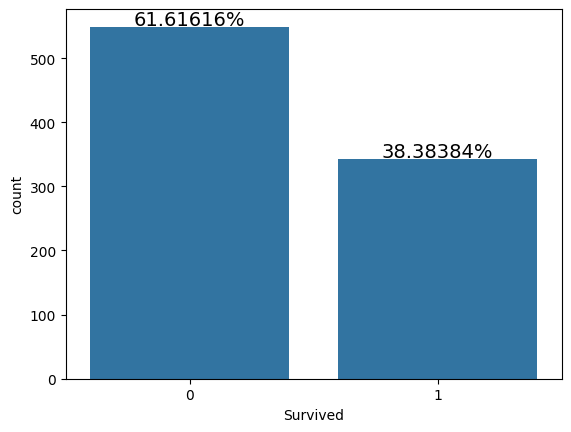

In [ ]:
# gráfica countplot
# https://seaborn.pydata.org/generated/seaborn.countplot.html
s = sns.countplot(x = 'Survived',data = titanic_df)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:8.5f}%'.format(height/len(titanic_df)*100),
            ha="center", fontsize=14)

Dado que el enfoque del cuaderno es detectar y manejar valores faltantes. Veamos ahora un proceso paso a paso para gestionar los valores faltantes en un conjunto de datos.

---
## 🎯 Detección de valores faltantes: técnicas de detección y visualización.
---
En Python, siempre que faltan valores, se utiliza un valor **NaN**, que indica que no hay ningún valor especificado para ese índice en particular. Puede haber varias razones por las que un valor podría ser NaN:
* Cuando se recuperan datos de una fuente externa y hay algunos valores incompletos en el conjunto de datos.
* Cuando unimos dos conjuntos de datos diferentes y algunos valores no coinciden.
* Valores faltantes debido a errores de recopilación de datos.
* Cuando cambia la forma de los datos, hay nuevas filas o columnas adicionales que no están determinadas.
* La reindexación (nuevo indice) de datos puede dar como resultado datos incompletos.


---
### 🥇 Técnicas de detección por Pandas
---
Para identificar y gestionar los valores faltantes, Pandas ofrece  funciones útiles: `isnull()` y `notnull()`. Estas funciones ayudan a detectar si un valor es NaN o no, lo que facilita la limpieza y el preprocesamiento de datos en un DataFrame o una serie.





**isnull()**

In [ ]:
# Indicar donde hay valores faltantes
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Indicar filas con algún valor faltante
titanic_df.isnull().any(axis=1)

,0
0,True
1,False
2,True
3,False
4,True
...,...
886,True
887,False
888,True
889,False


In [ ]:
titanic_df.isnull().any(axis=0)

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


Tenga en cuenta que los valores True indican los valores que son NaN. Bastante obvio, ¿verdad? Alternativamente, también podemos usar el método notnull() para hacer lo mismo. La única diferencia sería que la función indicará True para los valores que no sean nulos.

Podemos usar el método `sum()` para contar la cantidad de valores NaN en el DataFrame.

In [ ]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


El hecho de que `True` sea 1 y `False` sea 0 es la lógica principal para la suma. Los resultados anteriores muestran que 177 valores no fueron informados para `Age`, 687 para `Cabin`y 2 para `Embarked`.

* Función para el análisis exploratorio de datos ausentes en un conjunto de datos

In [ ]:
# Función para detecar valores faltantes usando isnull

def tabla_valores_faltantes(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns



In [ ]:
tabla_valores_faltantes(titanic_df)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


---
### 🥇 Detección visual mediante Missingno
---

Para analizar gráficamente la falta de datos, vamos a utilizar una biblioteca llamada [Missingno](https://github.com/ResidentMario/missingno) Es un paquete para el análisis gráfico de valores ausentes. Para utilizar esta biblioteca, tenemos que importarla de la siguiente manera:


In [ ]:
import missingno as msno

<Axes: >

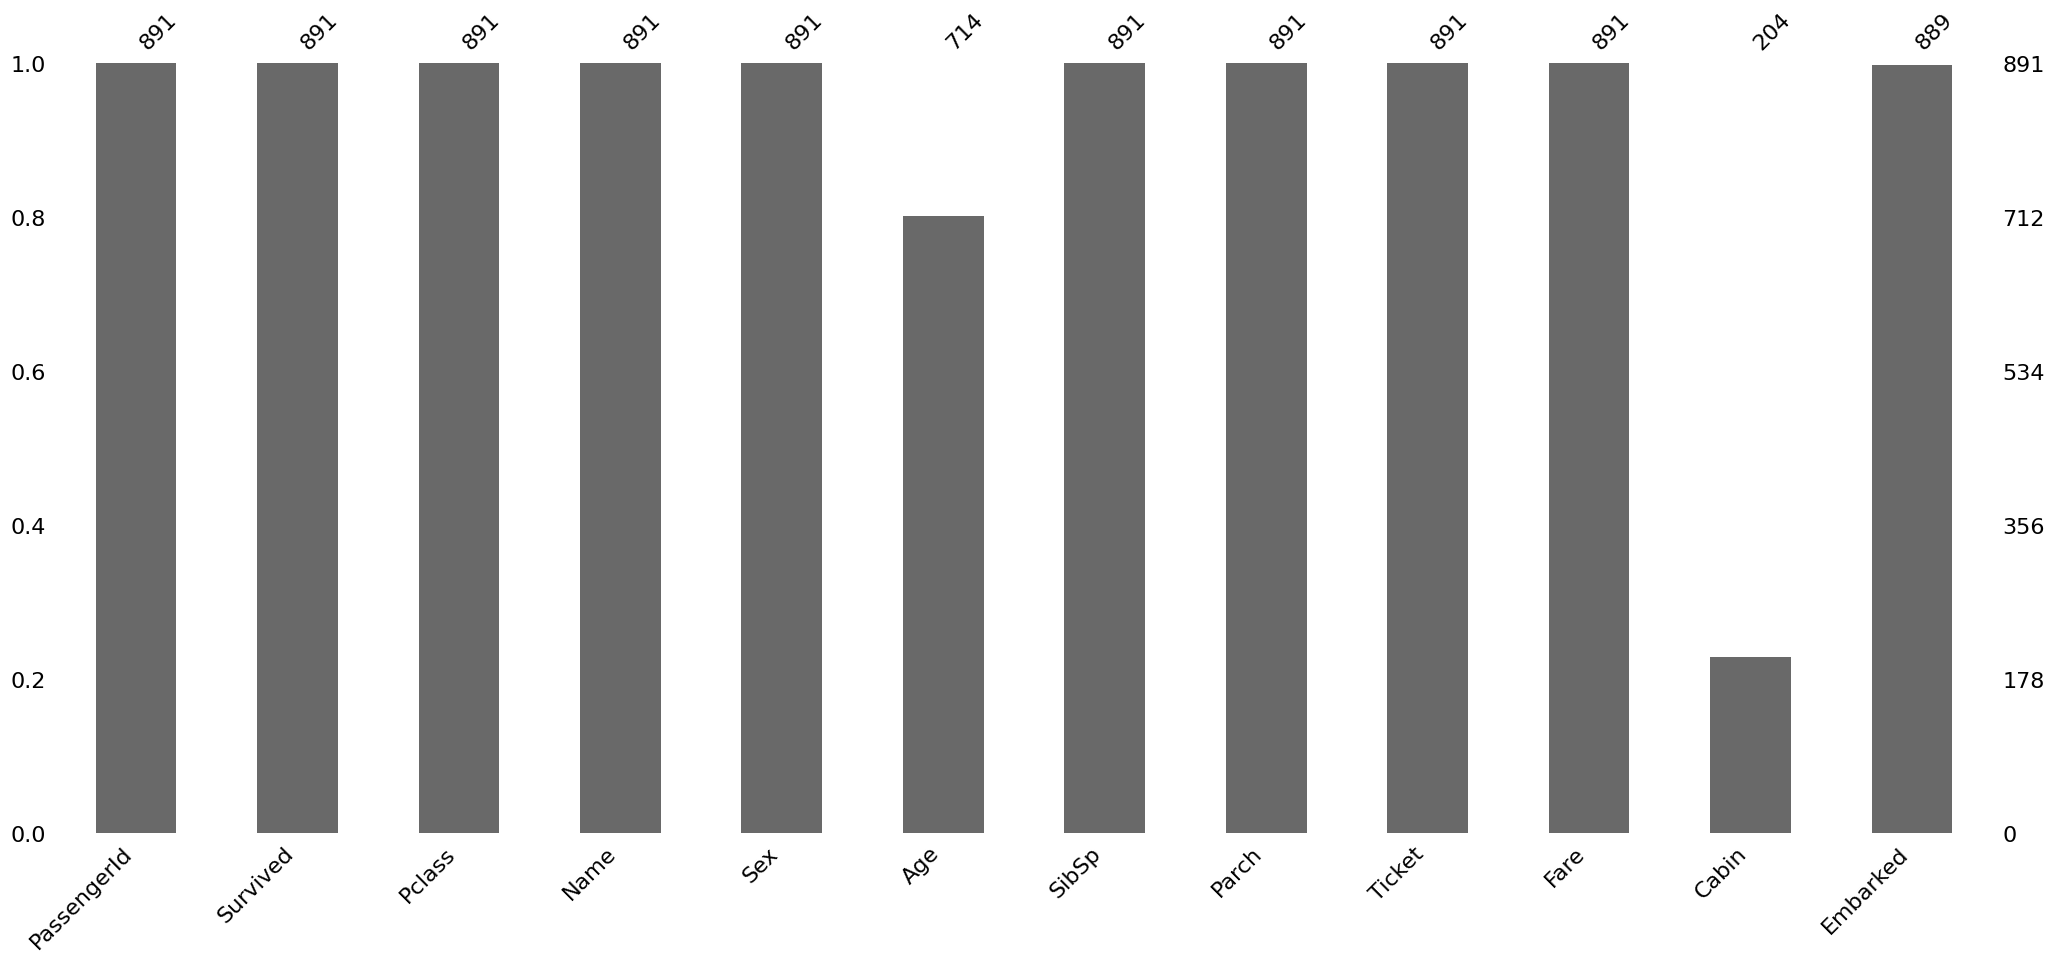

In [ ]:
# llamar gráfico de barra de valores faltantes
msno.bar(titanic_df)

>El gráfico de barras anterior ofrece una rápida visión gráfica de la completitud del conjunto de datos. Podemos ver que las columnas previamentes detectadas por valores faltantes son `Age`(714 de 891), `Cabin`( 204 de 891) `Embarked` (889 de 891). A continuación, sería conveniente determinar el patrón de los datos que faltante (tipo de datos faltantes).

#### Visualización de las ubicaciones de los datos que faltan

>La matriz de nulidad [msno.matrix](https://github.com/ResidentMario/missingno#matrix) es una visualización de datos que permite distinguir rápidamente patrones visuales en la completitud de los datos.

<Axes: >

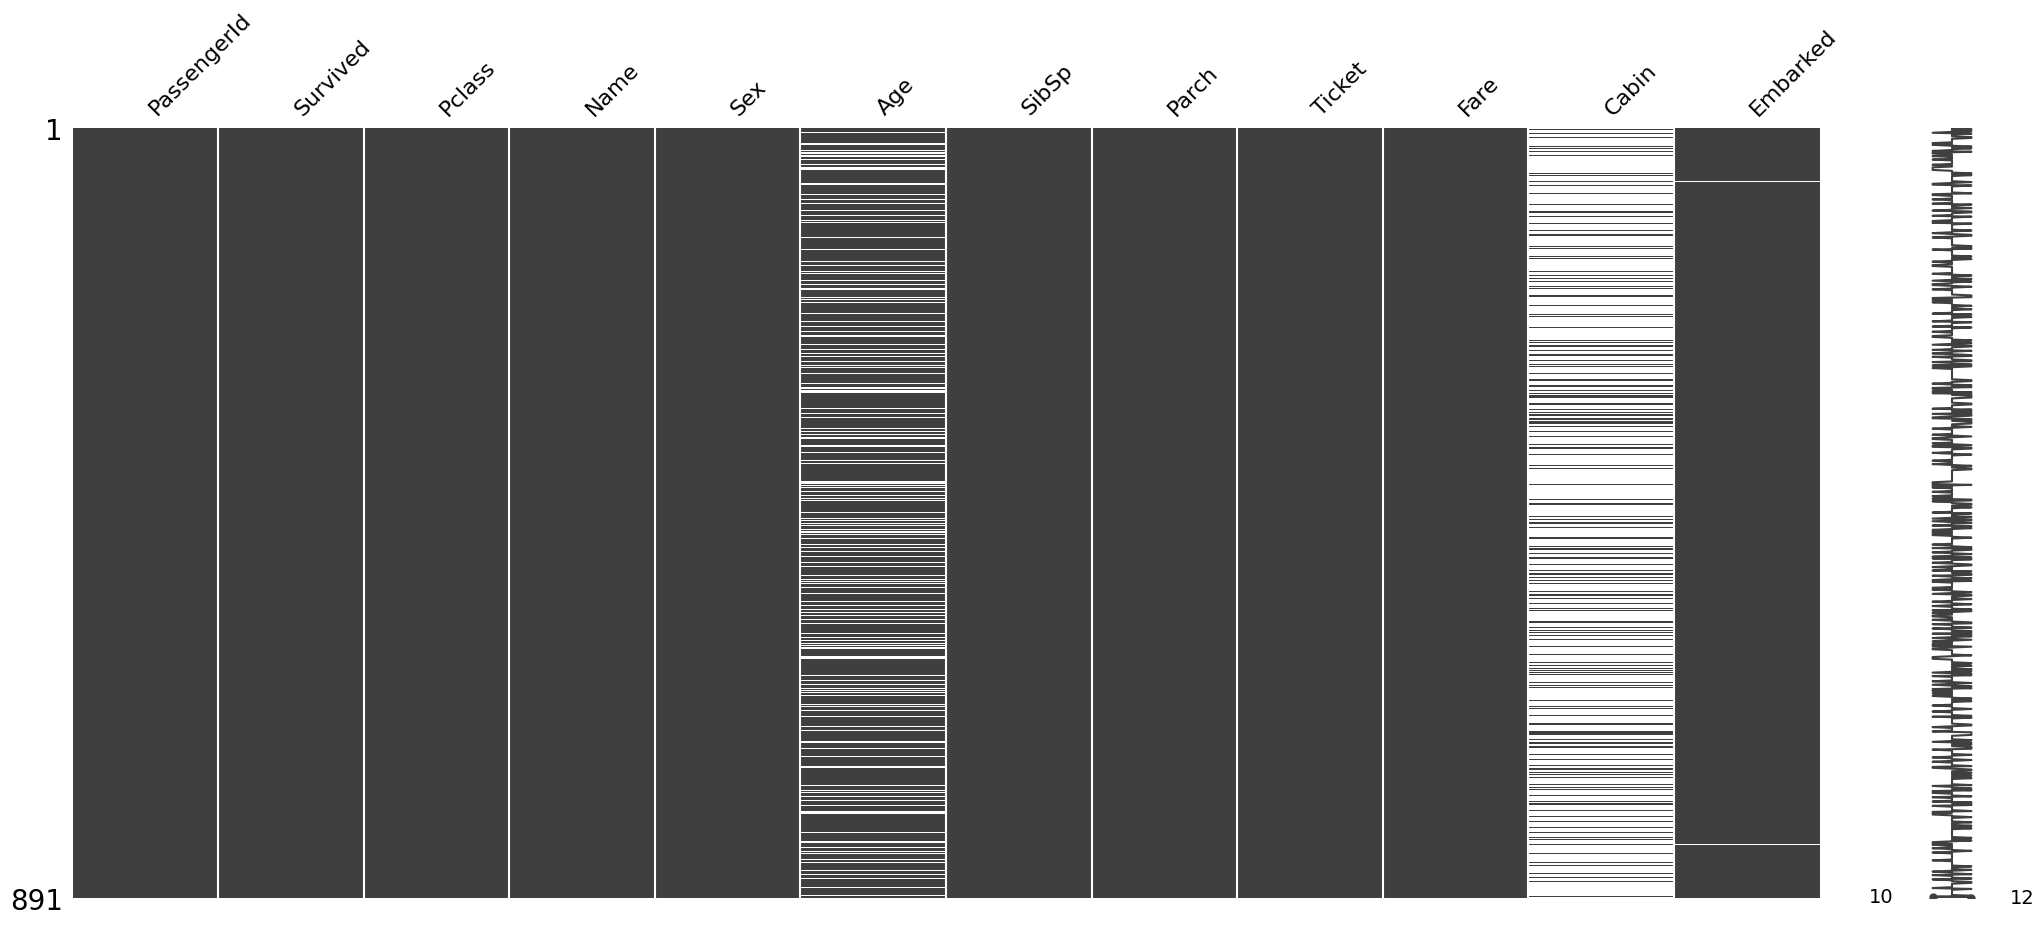

In [ ]:
msno.matrix(titanic_df)

>* El gráfico aparece en blanco cuando faltan valores. Por ejemplo, en la columna `Embarked` sólo faltan dos datos, de ahí las dos líneas blancas.
>* El gráfico de la derecha da una idea de la forma general de la completitud de los datos y señala la fila con el máximo de nulos y el número total de columnas en un conjunto de datos determinado, en la parte inferior.

También es posible muestrear el conjunto de datos para localizar con exactitud los valores que faltan. Por ejemplo, comprobemos las 100 primeras filas.

<Axes: >

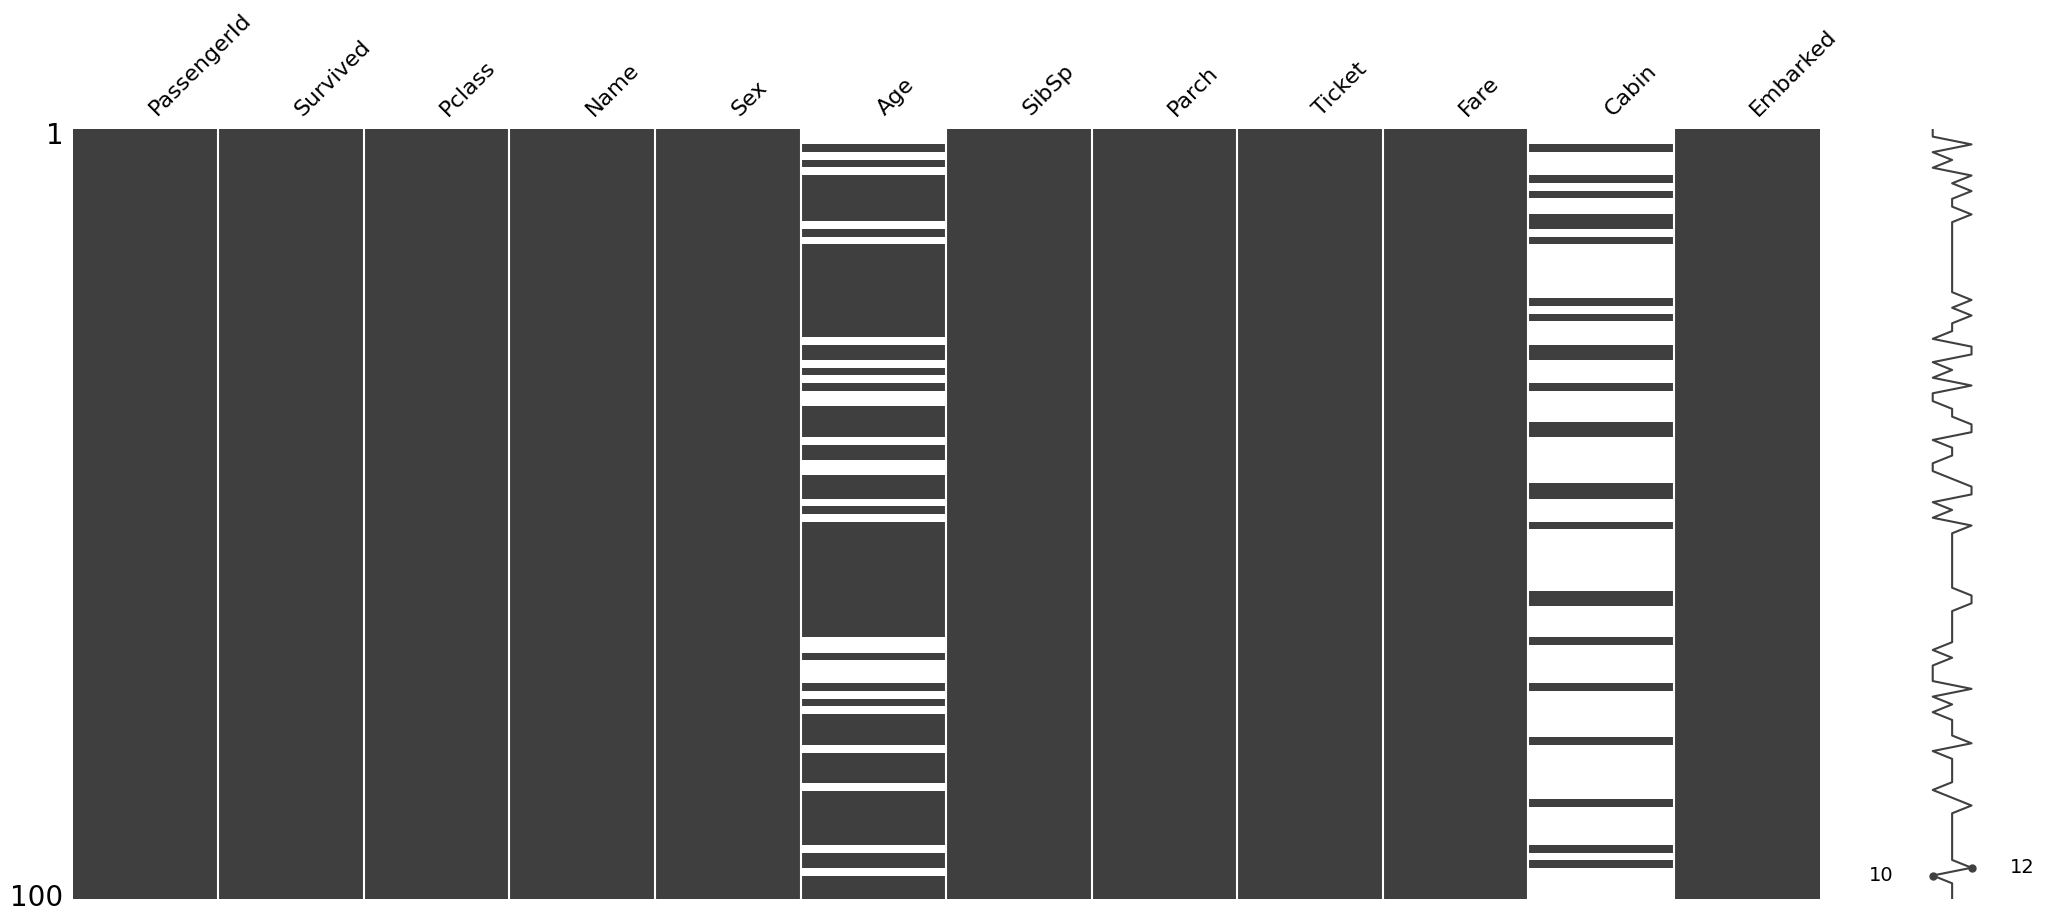

In [ ]:
msno.matrix(titanic_df.sample(100))

Esto demuestra que la variable `Embarked` no tiene ningún nulo en los 100 primeros casos.

>* La columna `Embarked` tiene muy pocos valores ausentes y no parecen encontrarse correlacionada con ninguna otra columna. Por lo tanto, la omisión en la columna `Embarked` puede atribuirse a una omisión completamente aleatoria.
* Tanto la columna `Age`  como la columna `Cabin` tienen muchos valores ausentes, lo que podría ser un caso de MAR, ya que no podemos observar directamente la razón por la que faltan datos en estas columnas.

El paquete missingno también nos permite ordenar el gráfico por los valores de una columna determinada. Vamos a ordenar los valores por las columnas `Age` y `Cabin` para ver si hay un patrón en los valores que faltan


<Axes: >

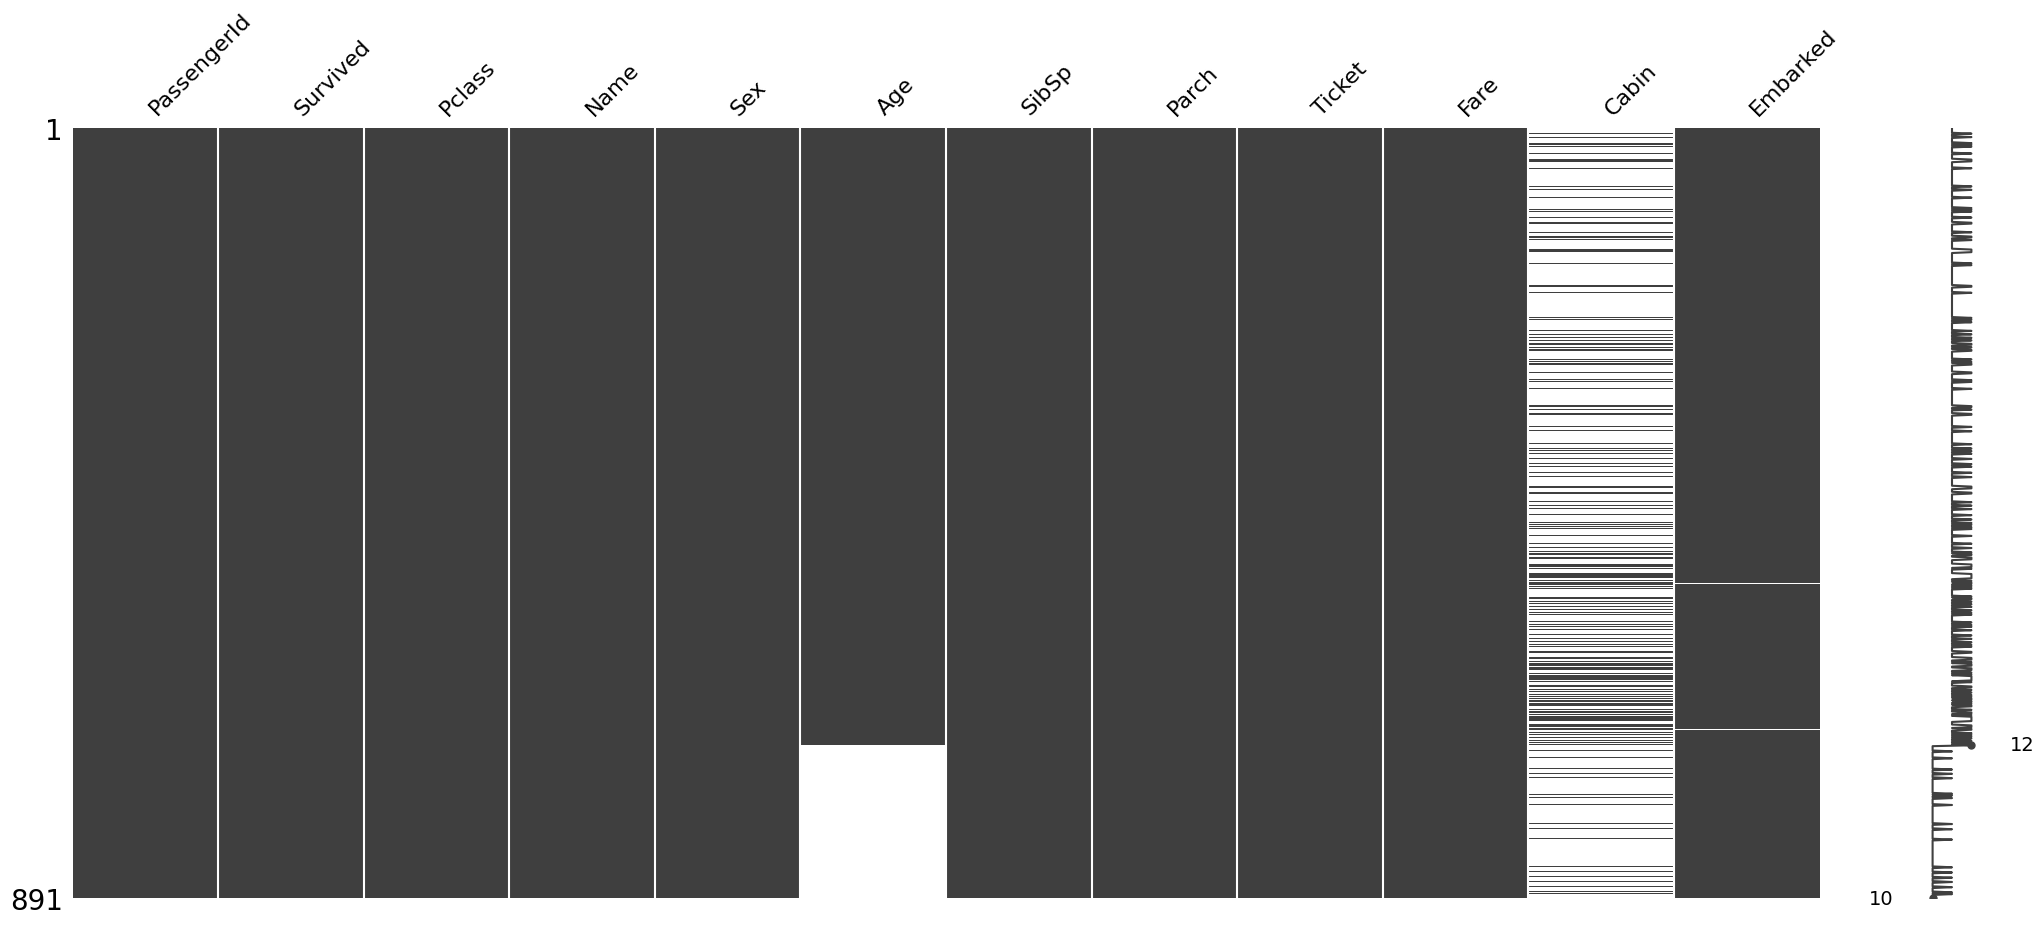

In [ ]:
#sorted by Age
sorted = titanic_df.sort_values('Age')
msno.matrix(sorted)

Por lo tanto, está claro que no hay relación entre la falta de datos en la columna Edad y Cabina. Para consolidar aún más esta conclusión, también podemos dibujar un mapa de calor entre las diferentes variables del conjunto de datos.

#####  Encontrar el motivo de la falta de datos mediante un Heatmap (correlacion)

La existencia de correlacion entre la presencia ausencia de datos faltantes en determinadas variables es una muestra de la falta de aleatoriedad del mecanismo de perdida. Aun asi, puede existir una relacion entre las variables que permita imputar el dato perdido como funcion de los datos relevados.

Abajo estamos mostrando un heatmap de correlaciones entre las columnas que tienen datos faltantes.

La correlación toma valores entre -1 y 1.

* -1 - Correlacion negativa exacta implica que si el valor de una variable está presente, en la otra esta ausente.

* 0 - Falta de correlacion implica que no se puede ver una relación lineal.

* 1 - Correlacion positva exacta implica que si una variable tiene valor, en la otra definitivamente va a tomar valor tambien.

<Axes: >

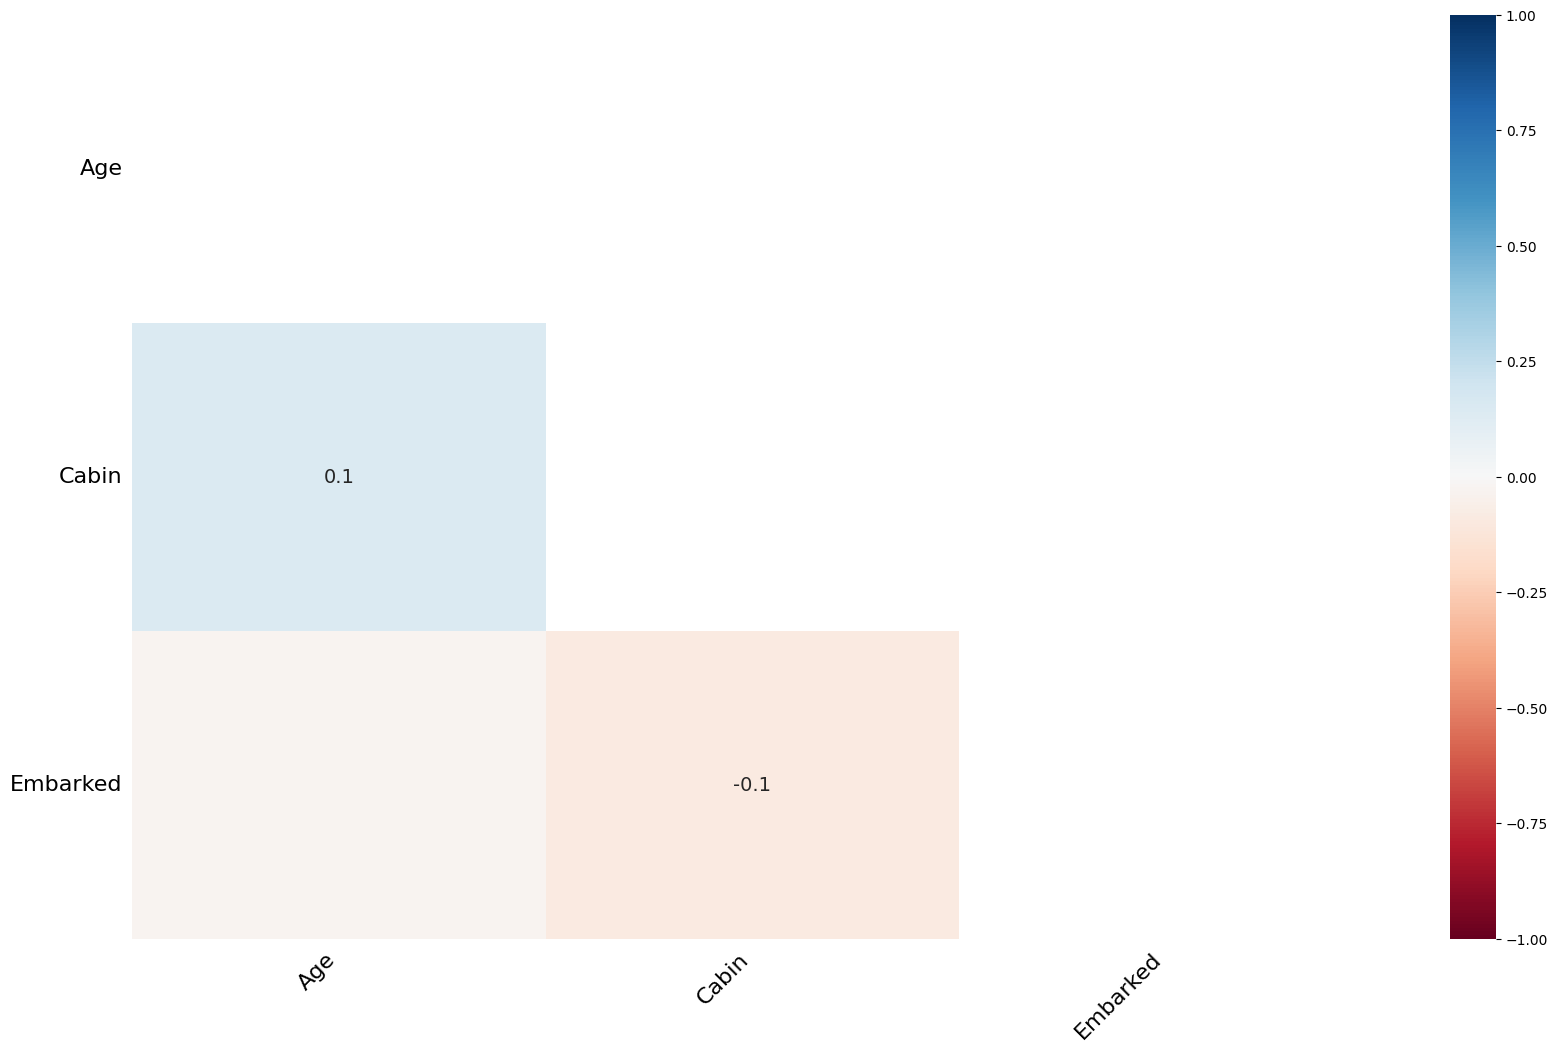

In [ ]:
msno.heatmap(titanic_df)

La función de mapa de calor muestra que no hay correlaciones fuertes entre los valores que ausentes de las distintas variables. Esto es bueno; las correlaciones bajas indican además que los datos son MAR.

##### Encontrar la razón de los datos faltantes mediante un dendograma
Un dendograma es un diagrama de árbol de la falta de datos. Agrupa las variables altamente correlacionadas.

<Axes: >

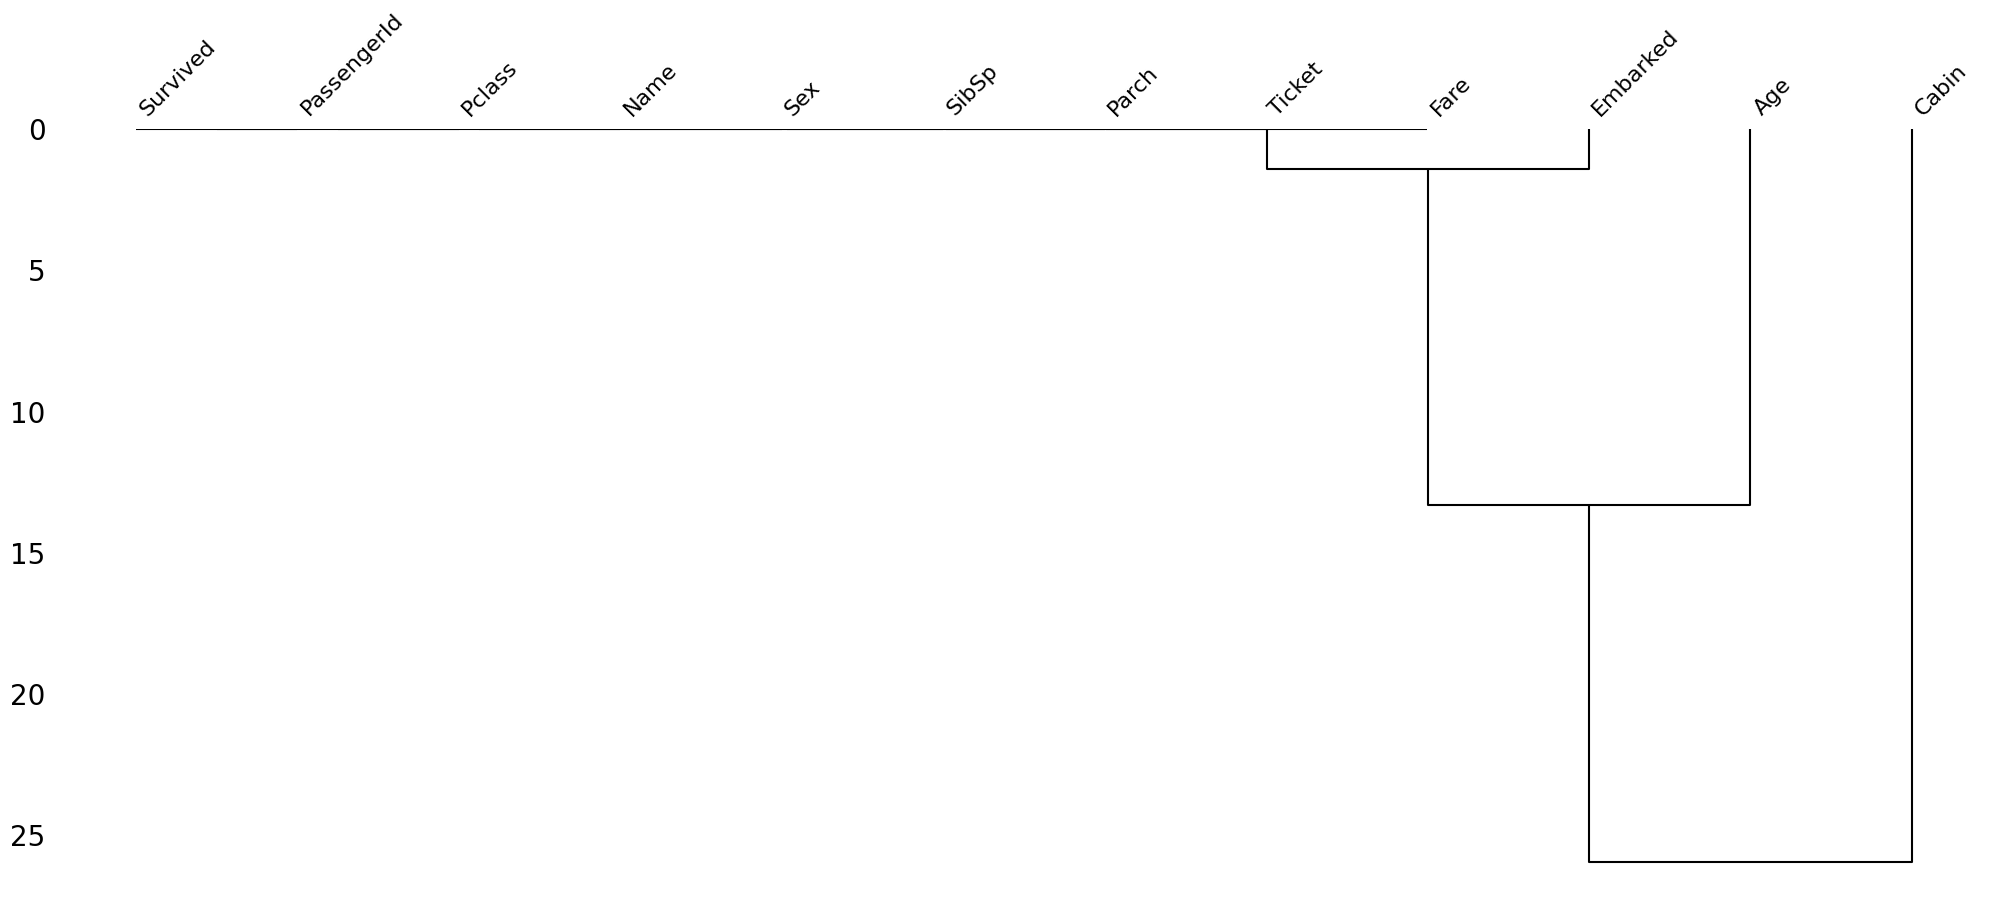

In [ ]:
msno.dendrogram(titanic_df)

Leamos el dendrograma anterior desde una perspectiva descendente:

* Las hojas de los clusters que se enlazan a una distancia de cero predicen completamente la presencia de la otra, una variable puede estar siempre vacía cuando otra está llena, o ambas pueden estar siempre llenas o ambas vacías, y así sucesivamente (missingno documentacion)

* la ausencia de Embarked tiende a ser más similar a Age que a Cabin, etc. Sin embargo, en este caso concreto, la correlación es alta, ya que la columna Embarked tiene muy pocos valores ausentes.

Este conjunto de datos no tiene muchos valores ausentes, pero si se utiliza la misma metodología en conjuntos de datos con muchos valores faltantes, sin duda surgirá algún patrón interesante.

---
## 🎯 Tratamiento de valores faltantes: métodos de Imputación.
---

Una vez identificados los patrones de los valores que faltan, es importante tratarlos. He aquí un diagrama de flujo que puede resultar útil:

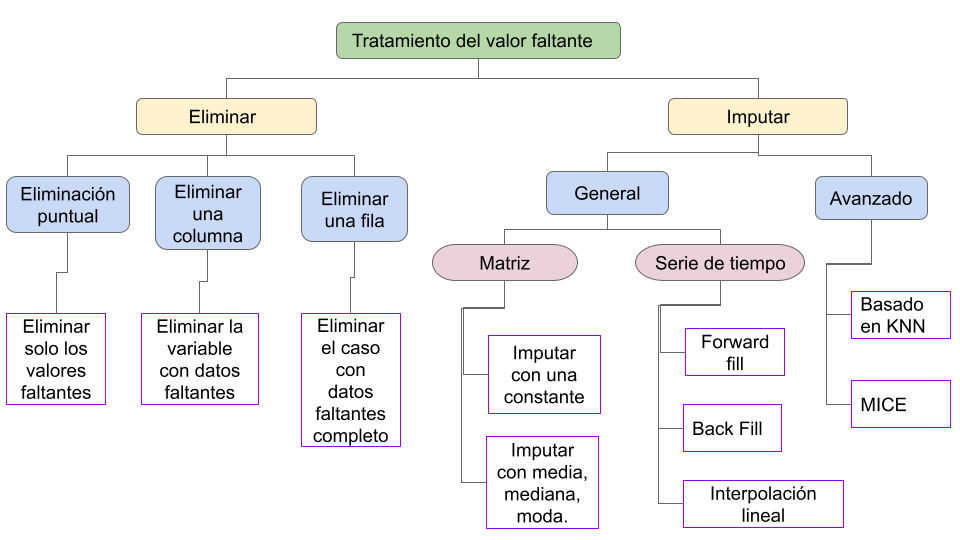


## Eliminar datos faltantes
Un método para gestionar los datos faltantes consiste simplemente en eliminar los registros (filas) o variables (columnas) que contienen valores faltantes.
Es una estrategia rápida y sencilla, y suele ser más adecuada cuando el porcentaje de datos faltantes es bajo en filas y estos aparecen en lugares aleatorios o columnas con un alta cantidad de valores faltantes.
El método que proporciona Pandas es `df.dropna()`.



In [ ]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


Age = 29.699118 (media)
Cabin = B96 B98 (moda)
Embarked = S (moda)

### Eliminar filas

Eliminar filas con valores faltantes, algunos o todos.

In [ ]:
# Eliminar filas que contienen algún valor faltante.
# Por defecto, los argumentos de la función  axis = 0 y  how = 'any' , garantizan la eliminación por fila y que presente
# algunos valores faltantes
# inplace= True para modificar el DataFrame en lugar de crear uno nuevo.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

titanic_dropna_fila_df = titanic_df.copy()
print("Cantidad de datos sin eliminación:",titanic_dropna_fila_df.shape)
titanic_dropna_fila_df.dropna(inplace=True)
print("Cantidad de datos con eliminación por fila:",titanic_dropna_fila_df.shape)

Cantidad de datos sin eliminación: (891, 12)
Cantidad de datos con eliminación por fila: (183, 12)


In [ ]:
titanic_dropna_fila_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,183.0,NaN,NaN,NaN,455.36612,247.052476,2.0,263.5,457.0,676.0,890.0
Survived,183.0,NaN,NaN,NaN,0.672131,0.470725,0.0,0.0,1.0,1.0,1.0
Pclass,183.0,NaN,NaN,NaN,1.191257,0.515187,1.0,1.0,1.0,1.0,3.0
Name,183,183,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,183,2,male,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,183.0,NaN,NaN,NaN,35.674426,15.643866,0.92,24.0,36.0,47.5,80.0
SibSp,183.0,NaN,NaN,NaN,0.464481,0.644159,0.0,0.0,0.0,1.0,3.0
Parch,183.0,NaN,NaN,NaN,0.47541,0.754617,0.0,0.0,0.0,1.0,4.0
Ticket,183,127,113760,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,183.0,NaN,NaN,NaN,78.682469,76.347843,0.0,29.7,57.0,90.0,512.3292


La eliminación de filas con valores faltantes ha dado lugar a un conjunto de datos más pequeño y los datos restantes ahora
tienen propiedades estadísticas diferentes. Ejemplo:
* Age = 29.699118 (media) vs 	35.674426 (media)
* Cabin = B96 B98 (moda) vs G6 (moda)
* Embarked = S (moda) vs S (moda)




Este método es adecuado cuando se considera que los valores faltantes son una
pequeña proporción del conjunto de datos y su eliminación no afecta significativamente a los datos.

Pero ¿qué es una pequeña proporción?
Una regla general es que si falta menos del 5 % de los datos, se considera que se trata de una pequeña proporción y que la eliminación podría no afectar significativamente el análisis. La importancia del cambio causado por la eliminación de puntos de datos se puede evaluar comparando los resultados de los análisis con y sin los datos faltantes. Si los resultados son consistentes, la eliminación podría no ser significativa.

In [ ]:
# Eliminar valores de filas para una especifica variable
titanic_dropna_fila_df = titanic_df.copy()
print("Cantidad de datos sin eliminación:", titanic_dropna_fila_df.shape)
titanic_dropna_fila_df.dropna(subset=['Age'], how='any', inplace=True)
print("Cantidad de datos con eliminación por fila:",titanic_dropna_fila_df.shape)


Cantidad de datos sin eliminación: (891, 12)
Cantidad de datos con eliminación por fila: (714, 12)


In [ ]:
titanic_dropna_fila_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Eliminar columnas
Eliminar columnas con valores faltantes, algunos o todos.

Si una columna contiene muchos valores faltantes, digamos más del 80%, y la característica no es significativa, es posible que desee eliminar esa característica. Sin embargo, de nuevo, no es recomendable borrar datos.

In [ ]:
# Eliminar columna que contienen algún valor faltante.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

titanic_dropna_columna_df = titanic_df.copy()
print("Cantidad de datos sin eliminación:",titanic_dropna_columna_df.shape)
titanic_dropna_columna_df.dropna(axis=1, inplace=True)
print("Cantidad de datos con eliminación por por columna:",titanic_dropna_columna_df.shape)

Cantidad de datos sin eliminación: (891, 12)
Cantidad de datos con eliminación por por columna: (891, 9)


In [ ]:
titanic_dropna_columna_df = titanic_df.copy()
print("Cantidad de datos sin eliminación:",titanic_dropna_columna_df.shape)
titanic_dropna_columna_df.drop(['Cabin'], axis=1, inplace=True)
print("Cantidad de datos con eliminación por por columna:",titanic_dropna_columna_df.shape)

Cantidad de datos sin eliminación: (891, 12)
Cantidad de datos con eliminación por por columna: (891, 11)


### Técnicas de imputación para datos no en series temporales

La imputación se utiliza a menudo cuando la eliminación de registros faltantes daría lugar a una pérdida significativa de información.
La imputación implica completar los valores faltantes con valores estimados o calculados. Los métodos de imputación comunes incluyen la imputación de media, mediana y moda, o el uso de técnicas más avanzadas.

Pandas ofrece el método `pd.fillna()`


#### Técnicas básicas de imputación

  - Imputación con un valor constante
  - Imputación utilizando estadísticos (media, mediana o más frecuente) de cada columna en la que se encuentran los valores que faltan



Imputación con un valor constante

In [ ]:
titanic_fillna_df = titanic_df.copy()
print("Cantidad de datos sin eliminación:",titanic_fillna_df.shape)
titanic_fillna_df.fillna(0,inplace=True)
print("Cantidad de datos con eliminación por por columna:",titanic_fillna_df.shape)

Cantidad de datos sin eliminación: (891, 12)
Cantidad de datos con eliminación por por columna: (891, 12)


In [ ]:
# Algunas columnas tienen valores faltantes. Me interesa mostrar registros que tengan valores faltantes - nulos
titanic_df.loc[titanic_df.isnull().any(axis=1)].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


In [ ]:
titanic_fillna_df.loc[titanic_df.isnull().any(axis=1)].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,0,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,0,S


In [ ]:
display(titanic_fillna_df.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic_fillna_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,23.799293,17.596074,0.0,6.0,24.0,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


Imputación utilizando estadísticos

La imputación de medias rellena los valores faltantes con la media de los valores observados en la variable. Es un método muy sencillo y no introduce sesgo cuando los valores faltantes son completamente aleatorios. Sin embargo, este método es sensible a los valores atípicos y puede distorsionar la distribución de la característica. La imputación mediana es robusta en presencia de valores atípicos y puede ser una buena opción cuando la distribución está sesgada.

In [ ]:
# Estadística para variables con datos faltantes
print("Estadísticas para \n * Age(media):{}\n * Cabin(moda):\n{}\n * Embarked(moda):\n{}" .format(titanic_df['Age'].mean(), titanic_df['Cabin'].mode(), titanic_df['Embarked'].mode()))

# Diccionario para indicar los variables y sus valores para imputar valores faltantes
valores = { "Age": titanic_df['Age'].mean(), "Cabin": titanic_df['Cabin'].mode()[0],"Embarked": titanic_df['Embarked'].mode()[0]}

# Copiar
titanic_fillna_df = titanic_df.copy()
display(titanic_fillna_df.loc[titanic_fillna_df.isnull().any(axis=1)].head(2))

# fillna por columnas por media y moda
titanic_fillna_df.fillna(valores,inplace = True)
display(titanic_fillna_df.loc[titanic_df.isnull().any(axis=1)].head(2))

Estadísticas para 
 * Age(media):29.69911764705882
 * Cabin(moda):
0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object
 * Embarked(moda):
0    S
Name: Embarked, dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,B96 B98,S


In [ ]:
titanic_fillna_df[['Age','Cabin','Embarked']].describe(include='all')

,Age,Cabin,Embarked
count,891.000000,891,891
unique,NaN,147,3
top,NaN,B96 B98,S
freq,NaN,691,646
mean,29.699118,NaN,NaN
std,13.002015,NaN,NaN
min,0.420000,NaN,NaN
25%,22.000000,NaN,NaN
50%,29.699118,NaN,NaN
75%,35.000000,NaN,NaN


In [ ]:
# Por columna
titanic_fillna_df = titanic_df.copy()
print('Antes de imputar Age')
display(titanic_fillna_df.loc[titanic_fillna_df['Age'].isnull(),['Age','Cabin','Embarked']].head(5))

#fillna
titanic_fillna_df['Age'] = titanic_fillna_df['Age'].fillna(titanic_fillna_df['Age'].mean())
print('Después de imputar Age por media')
display(titanic_fillna_df.loc[titanic_df['Age'].isnull(),['Age','Cabin','Embarked']].head(5))



Antes de imputar Age


,Age,Cabin,Embarked
5,NaN,NaN,Q
17,NaN,NaN,S
19,NaN,NaN,C
26,NaN,NaN,C
28,NaN,NaN,Q


Después de imputar Age por media


,Age,Cabin,Embarked
5,29.699118,NaN,Q
17,29.699118,NaN,S
19,29.699118,NaN,C
26,29.699118,NaN,C
28,29.699118,NaN,Q


**`SimpleImputer` de sklearn**

La estrategia de imputación:
* Si es “media”, entonces reemplaza los valores faltantes usando la media a lo largo de cada columna. Solo se puede usar con datos numéricos.
* Si es “mediana”, entonces reemplaza los valores faltantes usando la mediana a lo largo de cada columna. Solo se puede usar con datos numéricos.
* Si es “más_frecuente”, entonces reemplaza los valores faltantes usando el valor más frecuente a lo largo de cada columna. Se puede usar con cadenas o datos numéricos. Si hay más de un valor de este tipo, solo se devuelve el más pequeño.
* Si es “constante”, entonces reemplaza los valores faltantes con fill_value. Se puede usar con cadenas o datos numéricos.

Para más información, click en [SimpleImputer en documentación oficial](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Opción 1

In [ ]:
# importamos libreria
from sklearn.impute import SimpleImputer

In [ ]:
# copiamos
titanic_df_constant = titanic_df.copy()
#setting strategy to 'constant'
# creamos objeto de imputación

constant_imputer = SimpleImputer(strategy='constant') # imputing using constant value / fill_value=""


In [ ]:
constant_imputer

SimpleImputer(strategy='constant')

In [ ]:
display(titanic_df_constant.loc[titanic_df_constant.isnull().any(axis=1)].head(5))
# asignamos a dataframe

# imputamos por conSimpleImputer(strategy='constant')
titanic_df_constant.iloc[:,:] = constant_imputer.fit_transform(titanic_df_constant)
display(titanic_df_constant.isnull().sum())
display(titanic_df_constant.loc[titanic_df.isnull().any(axis=1)].head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


<ipython-input-41-6ff77fd447b2>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[22.0, 38.0, 26.0, 35.0, 35.0, 'missing_value', 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, 'missing_value', 31.0, 'missing_value', 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, 'missing_value', 19.0, 'missing_value', 'missing_value', 40.0, 'missing_value', 'missing_value', 66.0, 28.0, 42.0, 'missing_value', 21.0, 18.0, 14.0, 40.0, 27.0, 'missing_value', 3.0, 19.0, 'missing_value', 'missing_value', 'missing_value', 'missing_value', 18.0, 7.0, 21.0, 49.0, 29.0, 65.0, 'missing_value', 21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, 'missing_value', 'missing_value', 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0, 25.0, 'missing_value', 'missing_value', 0.83, 30.0, 22.0, 29.0, 'missing_value', 28.0, 17.0, 33.0, 16.0, 'missing_value', 23.0, 24.0, 29.0, 20.0, 46.0, 26.0, 59.0, 'missing_value', 71.0, 23.0, 34.0, 34.0, 28.0, 'missi

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing_value,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing_value,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing_value,S
5,6,0,3,"Moran, Mr. James",male,missing_value,0,0,330877,8.4583,missing_value,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,missing_value,S


### Opción 2

In [ ]:

titanic_df_constant = titanic_df.copy()

#setting strategy to 'constant'
# creamos objeto de imputación

constant_imputer = SimpleImputer(strategy='constant') # imputing using constant value

titanic_df_constant = pd.DataFrame(constant_imputer.fit_transform(titanic_df_constant), columns = titanic_df_constant.columns)
display(titanic_df_constant.isnull().sum())
display(titanic_df_constant)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing_value,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing_value,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing_value,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,missing_value,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,missing_value,1,2,W./C. 6607,23.45,missing_value,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


In [ ]:
type(constant_imputer.fit_transform(titanic_df_constant))

numpy.ndarray

In [ ]:
titanic_df_constant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        891 non-null    object
 11  Embarked     891 non-null    object
dtypes: object(12)
memory usage: 83.7+ KB


En el ejemplo dado, no se ha especificado un valor constante específico, por lo que el imputador utilizará el valor por defecto, que es 'missing_value'.

Si deseas especificar un valor constante diferente, puedes hacerlo proporcionando el parámetro `fill_value` al crear la instancia de SimpleImputer. Por ejemplo:

In [ ]:
# copiamos
titanic_df_constant = titanic_df.copy()


In [ ]:
# creamos objeto de imputación
contant_imputer = SimpleImputer(strategy='constant', fill_value=-999)
# aplicamos y asignamos
titanic_df_constant['Age'] = contant_imputer.fit_transform(titanic_df_constant[['Age']])

display(titanic_df_constant.isnull().sum())
display(titanic_df_constant)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-999.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df_constant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Pros:

- Trabaja con variables categóricas **sin necesidad de usar encodings** agregando una categoria mas.

### Cons:

- No tiene en cuenta las correlaciones entre las variables.

- Puede introducir **SESGOS** en los datos.

- Tiene sentido cuando la categoria que quiero agregar tiene sentido.

In [ ]:
from sklearn.impute import SimpleImputer
titanic_df_most_frequent = titanic_df.copy()

#setting strategy to 'mean' to impute by the mean
# creamos objeto de imputación

most_frequent_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median

# asignamos
titanic_df_most_frequent.iloc[:,:] = most_frequent_imputer.fit_transform(titanic_df_most_frequent)

display(titanic_df_most_frequent.isnull().sum())
display(titanic_df)
display(titanic_df_most_frequent)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C




### Pros:

- Anda bien con variables categóricas **sin necesidad de usar encodings**

### Cons:

- No tiene en cuenta las correlaciones entre las variables.

- Puede intruducir **SESGOS** en los datos.

#### Imputar con la media para las numericas y con la mas frecuente para las categoricas

In [ ]:
titanic_df_impute = titanic_df.copy()

categorical_columns = []
numeric_columns = []
for c in titanic_df_impute.columns:
    if titanic_df_impute[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)


titanic_df_numeric = titanic_df_impute[numeric_columns]
titanic_df_categorical = pd.DataFrame(titanic_df_impute[categorical_columns])

In [ ]:
titanic_df_numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [ ]:
titanic_df_categorical

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [ ]:
from sklearn.impute import SimpleImputer
# Para numéricas
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
titanic_df_numeric = pd.DataFrame(mean_imputer.fit_transform(titanic_df_numeric), columns = titanic_df_numeric.columns, index=titanic_df_numeric.index) #only apply imputer to numeric columns

# Para categóricas
most_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median
titanic_df_categorical.iloc[:,:] = most_imputer.fit_transform(titanic_df_categorical)


data_joined = pd.concat([titanic_df_numeric, titanic_df_categorical], axis = 1)

In [ ]:
data_joined

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,2.0,1.0,1.0,38.000000,1.0,0.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500,"Allen, Mr. William Henry",male,373450,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.000000,0.0,0.0,13.0000,"Montvila, Rev. Juozas",male,211536,B96 B98,S
887,888.0,1.0,1.0,19.000000,0.0,0.0,30.0000,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,889.0,0.0,3.0,29.699118,1.0,2.0,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,B96 B98,S
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000,"Behr, Mr. Karl Howell",male,111369,C148,C


In [ ]:
data_joined.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Name,0
Sex,0
Ticket,0


Existen diversar librerias trabajar con la limpieza de datos y la automatización. Usando [sklearn.pipeline import Pipeline](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html#sphx-glr-auto-examples-miscellaneous-plot-pipeline-display-py) ya se puede empezar.

Más ejemplos: [ver](https://stackoverflow.com/questions/57059571/how-to-use-simpleimputer-class-to-impute-missing-values-in-different-columns-wit)

#### Imputar por la media

##### Pros:

- Rápido y fácil

- Anda bien con datasets numéricos bien balanceados.

##### Cons:

- No tiene en cuenta las correlaciones entre las variables.

- Solo trabaja a nivel de columna

- Da resultados pobres en categoricas codificadas (No debe ser usado con variables categóricas)

- No es muy preciso, y no hay cómputo para el error.


### Técnicas de imputación para problemas de series temporales

Veamos ahora las formas de imputar datos en un problema típico de series temporales. Tratar los valores perdidos en un problema de series temporales es un poco diferente. El método `fillna()` se utiliza para imputar valores perdidos en este tipo de problemas.

* Técnicas básicas de imputación
  - ffill' o 'pad' - Sustituir NaN s por el último valor observado
  - bfill' o 'backfill' - Sustituir los valores NaN por el siguiente valor observado
  - Método de interpolación lineal

### Conjunto de datos de series temporales

El conjunto de datos se llama [Air Quality Data in India (2015 - 2020)](https://www.kaggle.com/rohanrao/air-quality-data-in-india) y contiene datos sobre la calidad del aire e ICA (Índice de Calidad del Aire) a nivel horario y diario de varias estaciones de múltiples ciudades de la India. El conjunto de datos tiene muchos valores perdidos y es un problema clásico de series temporales.

In [ ]:
city_day = pd.read_csv('city_day.csv',parse_dates=True,index_col='Date')
city_day1 = city_day.copy(deep=True)
city_day1.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
city_day1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  Xylene      11422 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(2)
memory usage: 3.6+ MB


En este cuaderno, vamos a mantener nuestro enfoque en los valores que faltan solamente. Como es evidente, city_day dataframe consiste en datos diarios del nivel de contaminación de algunas de las ciudades más importantes de la India.



In [ ]:
#Missing Values
city_day_missing = tabla_valores_faltantes(city_day1)
city_day_missing

Your selected dataframe has 15 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


Faltan muchos valores y en algunas columnas, como Xileno y PM10, faltan más del 50% de los valores. Veamos ahora cómo podemos imputar estos valores que faltan.



In [ ]:
city_day1['Xylene'][50:70]

,Xylene
Date,
2015-02-20,7.48
2015-02-21,15.44
2015-02-22,8.47
2015-02-23,28.46
2015-02-24,6.05
2015-02-25,0.81
2015-02-26,NaN
2015-02-27,NaN
2015-02-28,NaN


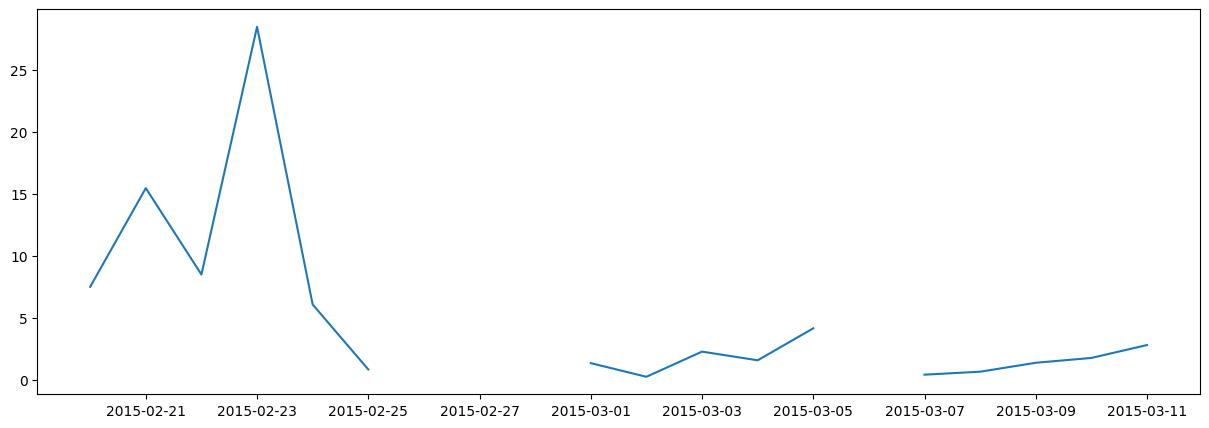

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot( city_day1['Xylene'][50:70])
plt.show()



Arriba vemos que faltan 3 valores en la columna Xileno, en ese rango.

#### Imputación utilizando ffill

In [ ]:
city_day1.fillna(method='ffill',inplace=True)
city_day1['Xylene'][50:70]

<ipython-input-60-135395c69cf9>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_day1.fillna(method='ffill',inplace=True)


,Xylene
Date,
2015-02-20,7.48
2015-02-21,15.44
2015-02-22,8.47
2015-02-23,28.46
2015-02-24,6.05
2015-02-25,0.81
2015-02-26,0.81
2015-02-27,0.81
2015-02-28,0.81


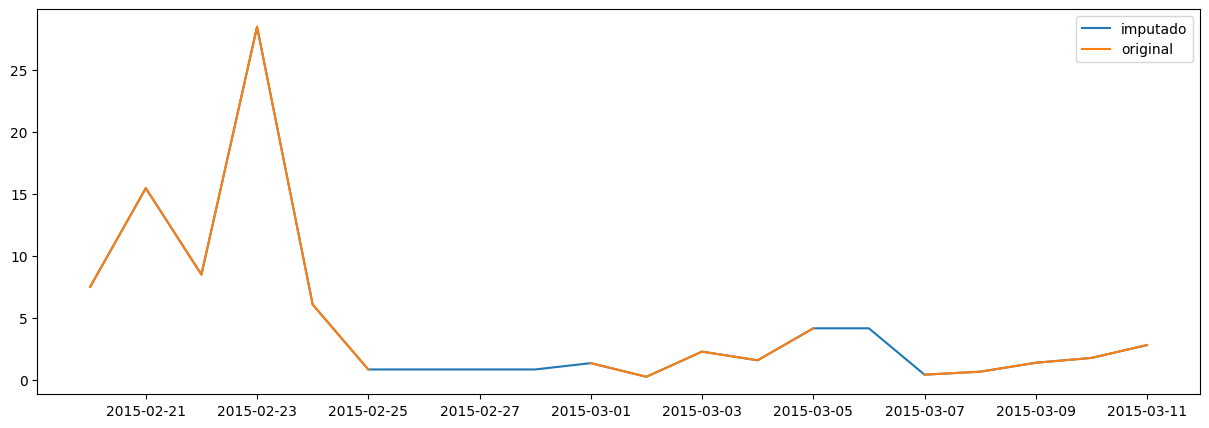

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(city_day1['Xylene'][50:70], label = "imputado")
plt.plot(city_day['Xylene'][50:70], label = "original")
plt.legend()
plt.show()

Podemos ver que todos los valores que faltan se han rellenado con los últimos valores observados.

#### Imputación utilizando bfill

In [ ]:
# Imputing AQI value
city_day1 = city_day.copy()
city_day1['AQI'][50:70]

,AQI
Date,
2015-02-20,588.0
2015-02-21,1141.0
2015-02-22,669.0
2015-02-23,1247.0
2015-02-24,411.0
2015-02-25,292.0
2015-02-26,NaN
2015-02-27,NaN
2015-02-28,NaN


In [ ]:
city_day1.fillna(method='bfill',inplace=True)
city_day1['AQI'][50:70]

<ipython-input-63-d38f96a8e660>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_day1.fillna(method='bfill',inplace=True)


,AQI
Date,
2015-02-20,588.0
2015-02-21,1141.0
2015-02-22,669.0
2015-02-23,1247.0
2015-02-24,411.0
2015-02-25,292.0
2015-02-26,189.0
2015-02-27,189.0
2015-02-28,189.0


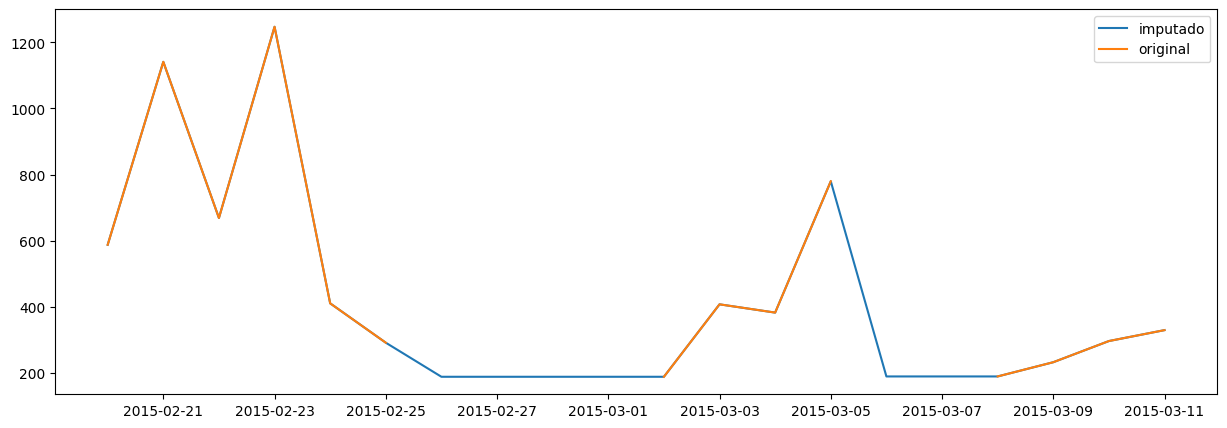

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(city_day1['AQI'][50:70], label = "imputado")
plt.plot(city_day['AQI'][50:70], label = "original")
plt.legend()
plt.show()

Podemos ver que todos los valores ausentes se han rellenado con los siguientes valores observados.

#### Imputación mediante el método de interpolación lineal

Los datos de series temporales varían mucho con el tiempo. Por lo tanto, la imputación mediante el relleno con backfill y forward fill no es la mejor solución posible para abordar el problema. Una alternativa más adecuada sería emplear el método de interpolación, en el que los valores se rellenan con valores crecientes o decrecientes en función de la tendencia.

La [interpolación lineal](https://www.lexjansen.com/nesug/nesug01/ps/ps8026.pdf) es una técnica de imputación que asume una relación lineal entre los valores de los datos, este aprovecha los valores presentes de las variables adyacentes para calcular el valor para un punto ausente.

Consulte la documentación oficial para obtener una lista completa de estrategias de interpolación [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

In [ ]:
city_day1 = city_day.copy()
city_day1['Xylene'][50:70]

,Xylene
Date,
2015-02-20,7.48
2015-02-21,15.44
2015-02-22,8.47
2015-02-23,28.46
2015-02-24,6.05
2015-02-25,0.81
2015-02-26,NaN
2015-02-27,NaN
2015-02-28,NaN


In [ ]:
# Interpolate using the linear method
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][50:70]

<ipython-input-66-a2caaea23cbc>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  city_day1.interpolate(limit_direction="both",inplace=True)


,Xylene
Date,
2015-02-20,7.4800
2015-02-21,15.4400
2015-02-22,8.4700
2015-02-23,28.4600
2015-02-24,6.0500
2015-02-25,0.8100
2015-02-26,0.9375
2015-02-27,1.0650
2015-02-28,1.1925


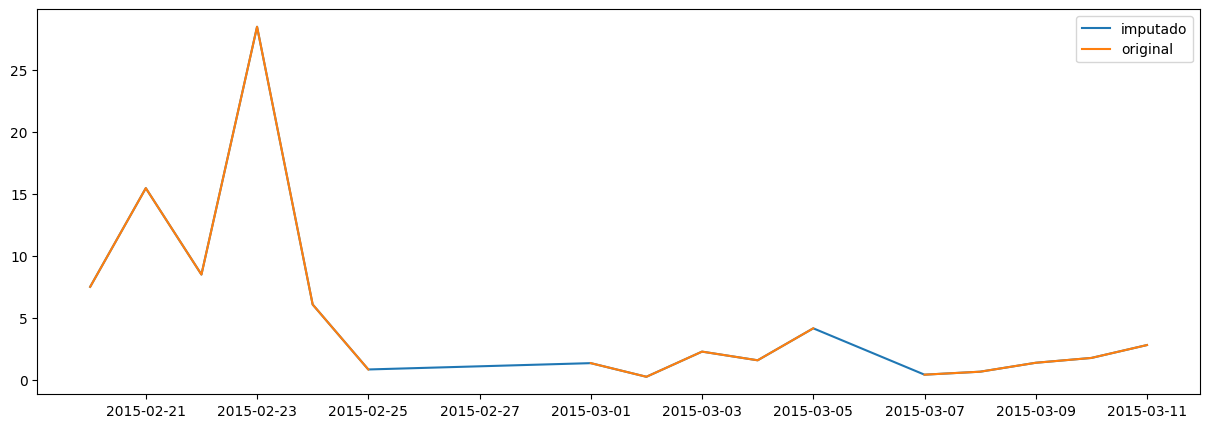

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(city_day1['Xylene'][50:70], label = "imputado")
plt.plot(city_day['Xylene'][50:70], label = "original")
plt.legend()
plt.show()

### Técnicas avanzadas de imputación

Las técnicas avanzadas de imputación utilizan algoritmos de aprendizaje automático para imputar los valores que faltan en un conjunto de datos, a diferencia de las técnicas anteriores, en las que utilizamos valores de otras columnas para predecir los valores ausentes. En este cuaderno examinaremos las siguientes dos técnicas:

* [Imputación de vecinos más cercanos](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)
* [Multivariate feature imputation](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation)

La clase [KNNImputer](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation) proporciona la imputación para rellenar los valores que faltan utilizando el enfoque k-Nearest Neighbors. Cada característica que falta se imputa utilizando los valores de n_vecinos más cercanos que tienen un valor para la característica. Las características de los vecinos se promedian uniformemente o se ponderan en función de la distancia a cada vecino.

K-Nearest Neighbor es un algoritmo muy utilizado para una clasificación simple. El algoritmo utiliza "similitud de características" para predecir los valores de cualquier nuevo punto de datos. Esto significa que al nuevo punto se le asigna un valor en función de su parecido con los puntos del conjunto de entrenamiento. Esto es muy útil para hacer predicciones sobre  valores faltantes al encontrar los k-vecinos más cercanos a la observación con datos perdidos y luego imputarlos en función de los valores no perdidos en el vecindario.

Hay varias librerias que tienen este algoritmo

- <span style="color:FireBrick">**Fancyimpute**</span>

- <span style="color:FireBrick">**impyute**</span>

- <span style="color:FireBrick">**sklearn.impute**</span>

El siguiente codigo tiene un ejemplo del uso de la clase KNNImputer de Sklearn

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
from sklearn.impute import KNNImputer


city_day_knn = city_day.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors = 3) # , weights="uniform"
city_day_knn['Xylene'] = knn_imputer.fit_transform(city_day_knn[['Xylene']])

In [ ]:
city_day['Xylene'][50:70]

,Xylene
Date,
2015-02-20,7.48
2015-02-21,15.44
2015-02-22,8.47
2015-02-23,28.46
2015-02-24,6.05
2015-02-25,0.81
2015-02-26,NaN
2015-02-27,NaN
2015-02-28,NaN


In [ ]:
city_day_knn['Xylene'][50:70]

,Xylene
Date,
2015-02-20,7.480000
2015-02-21,15.440000
2015-02-22,8.470000
2015-02-23,28.460000
2015-02-24,6.050000
2015-02-25,0.810000
2015-02-26,3.070128
2015-02-27,3.070128
2015-02-28,3.070128


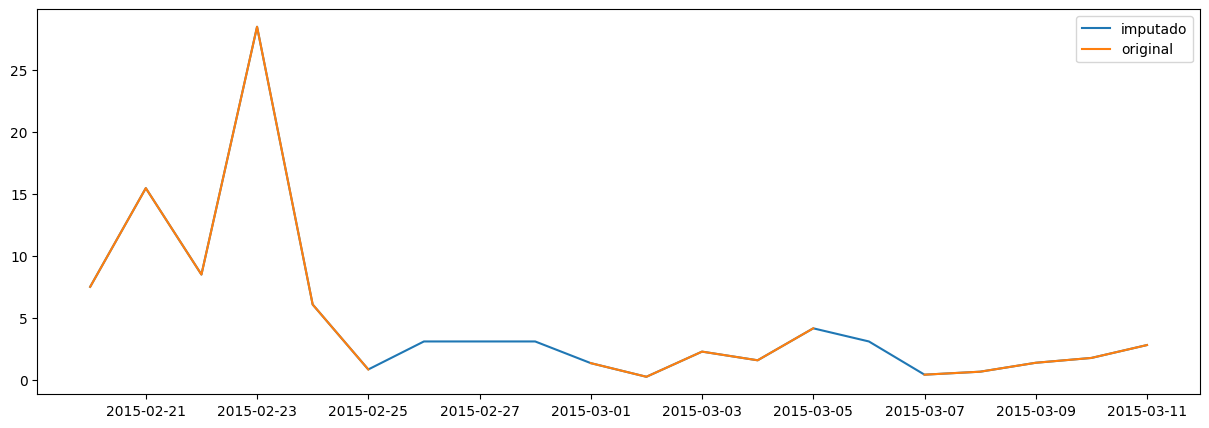

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(city_day_knn['Xylene'][50:70], label = "imputado")
plt.plot(city_day['Xylene'][50:70], label = "original")
plt.legend()
plt.show()

**¿Qué pasa si trabajo con las variables categóricas?**

In [ ]:
from sklearn.impute import KNNImputer

city_day_knn = city_day.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors = 3) # , weights="uniform"
knn_imputer.fit_transform(city_day_knn)

ValueError: could not convert string to float: 'Ahmedabad'

KNNImputer no es adecuado para valores categóricos (tanto ordinales como nominales), ya que, como se indica en los documentos de scikit-learn [doc](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html):



> Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the titanic_dfing set. Two samples are close if the features that neither is missing are close.

Utiliza la media de los vecinos mientras que en su lugar necesita la moda, o una categoría en general.

En general,  para imputar valores categóricos faltantes se sugiere convertir los valores categóricos no faltantes a valores ordinales o numéricos, imputar los valores transformados y, por último, volver a convertirlos a valores categóricos.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder


In [ ]:
missing_categoricas = [col for col in city_day.columns if city_day[col].isnull().sum() > 0 and  city_day[col].dtypes == 'O']

In [ ]:
missing_categoricas

['AQI_Bucket']

In [ ]:
city_day['AQI_Bucket'].isnull().mean()*100

15.851139480545868

<Axes: xlabel='AQI_Bucket'>

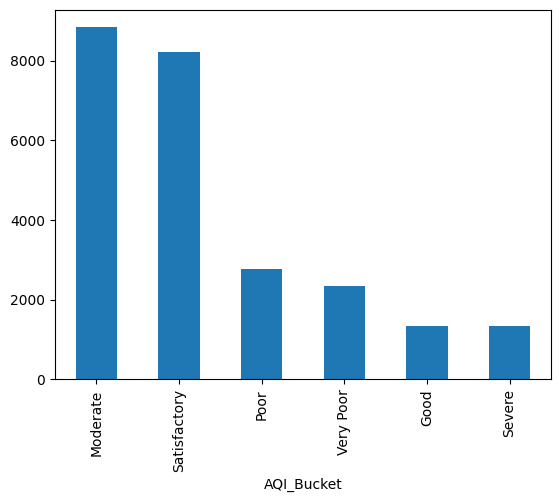

In [ ]:
city_day['AQI_Bucket'].value_counts().plot.bar()

In [ ]:
# crear objeto OrdinalEncoder
encoder = OrdinalEncoder()

# seleccionar los not null
nonulls = city_day['AQI_Bucket']
nonulls = nonulls[nonulls.notnull()]

# reshapes los datos para encoding
impute_reshape = nonulls.values.reshape(-1,1)
impute_reshape

#encode dato
impute_ordinal = encoder.fit_transform(impute_reshape)
impute_ordinal

#Asignar valores codificados nuevamente a valores no nulos
nonulls.loc[nonulls.notnull()] = np.squeeze(impute_ordinal)

In [ ]:
nonulls

,AQI_Bucket
Date,
2015-01-29,2.0
2015-01-30,5.0
2015-01-31,4.0
2015-02-01,4.0
2015-02-02,4.0
...,...
2020-06-27,0.0
2020-06-28,3.0
2020-06-29,3.0


In [ ]:
def encode(data,encoder):

    # seleccionar los not null

    nonulls = data[data.notnull()]


    # reshapes los datos para encoding
    impute_reshape = nonulls.values.reshape(-1,1)


    #encode dato
    impute_ordinal = encoder.fit_transform(impute_reshape)


    #Asignar valores codificados nuevamente a valores no nulos
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)

    return data

In [ ]:
# Para todas las variables categoricas
city_day_knn = city_day.copy(deep=True)
ordinal_enc_dic  = {}

encoder_ord = OrdinalEncoder()
for col_name in missing_categoricas:
  # encoder para cada variable
  ordinal_enc_dic[col_name] = OrdinalEncoder()
  encode(city_day_knn[col_name],ordinal_enc_dic[col_name])



<ipython-input-81-a9c5403e366c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(impute_ordinal)


In [ ]:
city_day_knn['AQI_Bucket'].loc[city_day_knn['AQI_Bucket'].notnull()]


,AQI_Bucket
Date,
2015-01-29,2.0
2015-01-30,5.0
2015-01-31,4.0
2015-02-01,4.0
2015-02-02,4.0
...,...
2020-06-27,0.0
2020-06-28,3.0
2020-06-29,3.0


In [ ]:
city_day_knn.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
# imputamos
knn_imputer = KNNImputer(n_neighbors = 3) # , weights="uniform"
city_day_knn.iloc[:,1:]  = np.round(knn_imputer.fit_transform(city_day_knn.iloc[:,1:] ))


In [ ]:
city_day_knn.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,27.0,186.0,1.0,18.0,17.0,10.0,1.0,28.0,133.0,0.0,0.0,0.0,101.0,2.0
2015-01-02,Ahmedabad,24.0,164.0,1.0,16.0,16.0,10.0,1.0,25.0,34.0,4.0,6.0,4.0,121.0,2.0
2015-01-03,Ahmedabad,78.0,182.0,17.0,19.0,30.0,9.0,17.0,29.0,31.0,7.0,16.0,2.0,205.0,3.0
2015-01-04,Ahmedabad,43.0,229.0,2.0,18.0,18.0,10.0,2.0,19.0,36.0,4.0,10.0,1.0,153.0,1.0
2015-01-05,Ahmedabad,136.0,259.0,22.0,21.0,38.0,9.0,22.0,39.0,39.0,7.0,19.0,3.0,324.0,3.0


In [ ]:
city_day_knn.isnull().mean()*100

,0
City,0.0
PM2.5,0.0
PM10,0.0
NO,0.0
NO2,0.0
NOx,0.0
NH3,0.0
CO,0.0
SO2,0.0
O3,0.0


In [ ]:
for col_name in missing_categoricas:
    # reshapes los datos para encoding
    reshape = city_day_knn[col_name].values.reshape(-1,1)
    city_day_knn.loc[:,col_name] = ordinal_enc_dic['AQI_Bucket'].inverse_transform(reshape) # inverse_transform devuelve un numpy.ndarray


In [ ]:
city_day_knn.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,27.0,186.0,1.0,18.0,17.0,10.0,1.0,28.0,133.0,0.0,0.0,0.0,101.0,Poor
2015-01-02,Ahmedabad,24.0,164.0,1.0,16.0,16.0,10.0,1.0,25.0,34.0,4.0,6.0,4.0,121.0,Poor
2015-01-03,Ahmedabad,78.0,182.0,17.0,19.0,30.0,9.0,17.0,29.0,31.0,7.0,16.0,2.0,205.0,Satisfactory
2015-01-04,Ahmedabad,43.0,229.0,2.0,18.0,18.0,10.0,2.0,19.0,36.0,4.0,10.0,1.0,153.0,Moderate
2015-01-05,Ahmedabad,136.0,259.0,22.0,21.0,38.0,9.0,22.0,39.0,39.0,7.0,19.0,3.0,324.0,Satisfactory


#### Pros:

- Rápido y fácil

- Anda bien con datasets numéricos bien balanceados.

#### Cons:

- Usa distancias calculadas usando los casos, aun cuando tengan NaN's, pero deben ser todas variables numericas.

- Antes de imputar, hay que codificar las variables, usando HotEncoding, LabelEncoding o OrdinalEncoding

- KNN Imputer precisa que los datos esten estandarizados. Datos con diferentes escalas introducen valores de reemplazo sesgados   Scikit-Learn’s MinMaxScaler escala las variables al [0,1].

- No es muy preciso, y no hay computo para el error.

- CouncilArea no puede ser imputada sin realizar encoding primero.

#### Multivariate feature imputation - Imputación multivariante por ecuaciones encadenadas (MICE - ‘Multiple Imputation by Chained Equation)
Una estrategia para imputar valores ausentes es modelando cada característica con valores ausentes como una función de otras características con valores presentes de forma rotatoria. Realiza regresiones múltiples sobre una muestra aleatoria de los datos, luego toma el promedio de los valores de regresión múltiple y utiliza ese valor para imputar el valor que falta.

Este tipo de imputación funciona llenando los datos faltantes varias veces. Las imputaciones múltiples (IM) son mucho mejores que una sola imputación, ya que mide la incertidumbre de los valores perdidos de una mejor manera. El enfoque de ecuaciones encadenadas también es muy flexible y puede manejar diferentes variables de diferentes tipos de datos (es decir, continuos o binarios), así como complejidades como límites o patrones de omisión de encuestas.

La version de Sklearn no permite trabajar con variables de distinto tipo, hay que realizar encoding. En sklearn, se implementa de la siguiente manera:



In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
city_day_mice = city_day.copy(deep=True)


In [ ]:
missing_mask = city_day.isna()
city_day_mice[missing_mask.any(axis=1)].head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
?IterativeImputer

In [ ]:
# creamos objeto de imputación mice
mice_imputer = IterativeImputer()
city_day_mice['Xylene'] = mice_imputer.fit_transform(city_day_mice[['Xylene']])

In [ ]:
city_day['Xylene'].describe()

,Xylene
count,11422.000000
mean,3.070128
std,6.323247
min,0.000000
25%,0.140000
50%,0.980000
75%,3.350000
max,170.370000


In [ ]:
city_day_mice['Xylene'][50:70]

,Xylene
Date,
2015-02-20,7.480000
2015-02-21,15.440000
2015-02-22,8.470000
2015-02-23,28.460000
2015-02-24,6.050000
2015-02-25,0.810000
2015-02-26,3.070128
2015-02-27,3.070128
2015-02-28,3.070128


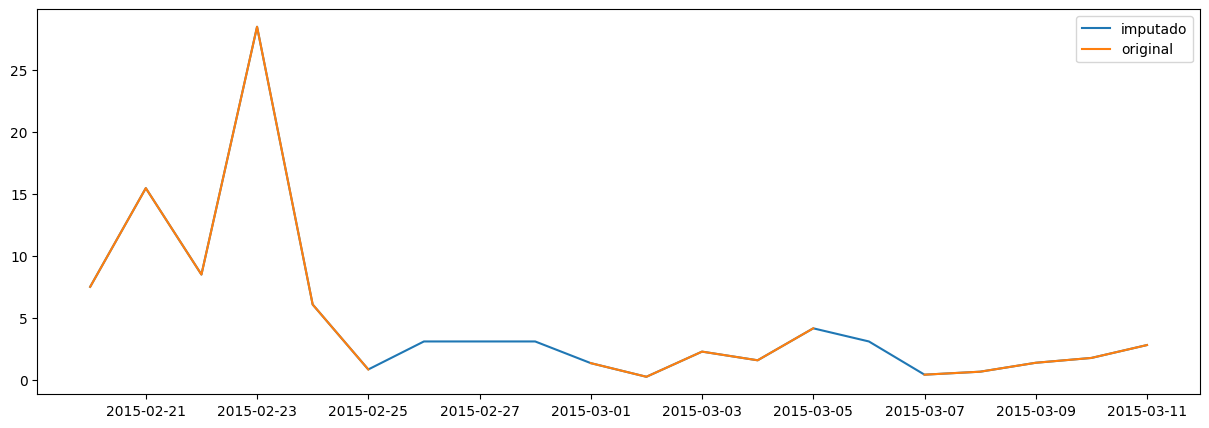

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(city_day_mice['Xylene'][50:70], label = "imputado")
plt.plot(city_day['Xylene'][50:70], label = "original")
plt.legend()
plt.show()

In [ ]:
city_day_mice['Xylene'].isnull().sum()

0

#### Pros:

- Versatil, puede utilizarse con diferentes clases de clasificadores

#### Cons

- La version de Sklearn no admite datos mixtos, debe realizarse un encoding primero.

# Conclusión

 No existe una forma perfecta de compensar los valores perdidos en un conjunto de datos. Cada estrategia puede funcionar mejor para ciertos conjuntos de datos y tipos de datos faltantes, pero puede funcionar mucho peor en otros tipos de conjuntos de datos. Hay algunas reglas establecidas para decidir qué estrategia usar para tipos particulares de valores perdidos, pero más allá de eso, debe experimentar y verificar qué modelo funciona mejor para su conjunto de datos.

# Referencias y buenos recursos

* [Dealing with Missing Data in Python](https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/the-problem-with-missing-data?ex=1)
* [Cómo manejar los datos que faltan](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)
* [Python data science handbook: handling missing data](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)
